# Курсовой проект

## Импорт библиотек

In [480]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
%matplotlib inline

## Функции

#### Преобразование категорийных признаков в бинарные

In [481]:
def get_binar(d_set, d_columns):
    for i in d_columns:
        d_set.loc[d_set[i]=='A', i] = 1
        d_set.loc[d_set[i]=='B', i] = 0
        d_set[i] = d_set[i].astype(int)
    return d_set

#### График для оценки качества модели

In [482]:
def evaluate_preds(true_values, pred_values):

    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    plt.show()

## Загрузка данных

In [483]:
DATASET_PATH = './train.csv'
data = pd.read_csv(DATASET_PATH, sep = ',')

TEST_SET_PATH = './test.csv'
data_test = pd.read_csv(TEST_SET_PATH, sep = ',')

## Анализ данных

### Анализ train

In [484]:
data.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [485]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

#### Исследуем параметр 'Price'

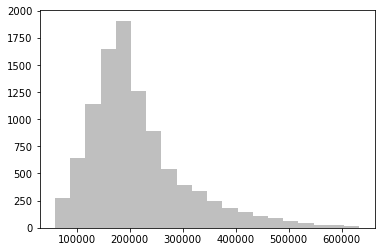

In [487]:
plt.hist(data['Price'], bins=20, density = False, alpha = 0.5, color='Grey')
rcParams["figure.figsize"] = 9, 9
plt.show()

Вывод: явные аномалии и "выбросы" не наблюдаются

#### Исследуем дополнительно стоимость 1 кв. метра

In [488]:
data = data.assign(PricePM = data.Price / data.Square)

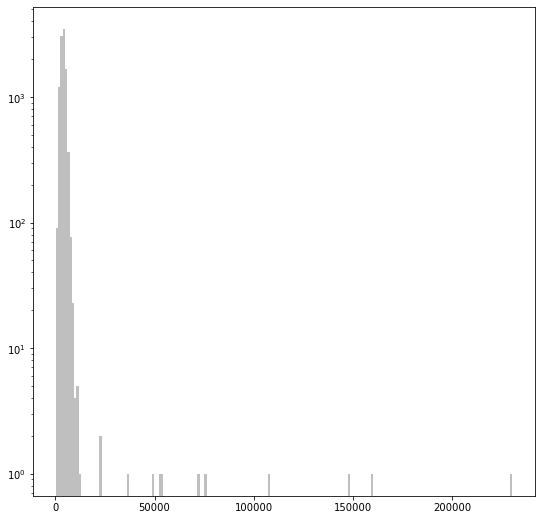

In [489]:
plt.hist(data['PricePM'], bins=200, density = False, alpha = 0.5, color='Grey')
rcParams["figure.figsize"] = 9, 5
plt.yscale(value="log")
plt.show()

Имеются "выбросы".
Рассмотрим объекты с ценой 1 кв. метра до 20000

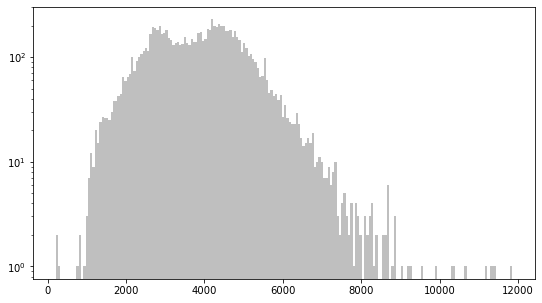

In [490]:
plt.hist(data[data['PricePM']<20000]['PricePM'], bins=200, density = False, alpha = 0.5, color='Grey')
rcParams["figure.figsize"] = 9, 5
plt.yscale(value="log")
plt.show()

In [491]:
data[data['PricePM']>20000]['PricePM'].count()

12

Вывод: имеются объекты с аномальной ценой 1 кв. метра. Число объектов с ценой > 20000 составляет 12 (0,12% от всех наблюдений)

#### Исследуем год постройки

In [492]:
data.loc[data['HouseYear']>2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePM
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,...,B,30,6141,10,262.0,3,6,B,254084.534396,6818.302873
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,...,B,25,4756,16,2857.0,5,8,B,243028.603096,5425.734320


Вывод: имеются объекты с некорректным годом постройки

#### Исследуем этажность

In [493]:
data.loc[data['HouseFloor'] > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePM
540,5279,93,2.0,60.804544,30.923827,11.0,5,45.0,2016,0.050900,...,B,43,10621,1,30.0,2,3,B,213171.135199,3505.842194
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,...,B,7,1660,39,1786.0,1,5,B,411691.504766,5537.606029
3974,6502,20,1.0,126.389517,103.637322,14.0,22,47.0,2012,0.019509,...,B,37,7687,11,176.0,5,5,B,450706.552655,3566.012136
4323,6589,30,1.0,62.110823,52.812128,4.0,31,44.0,2009,0.000078,...,B,22,6398,141,1046.0,3,23,B,117647.461002,1894.153952
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,...,B,16,3433,4,2643.0,4,5,B,296127.115515,5700.827183
7728,7453,24,3.0,126.621358,62.455481,12.0,22,48.0,2011,0.111627,...,B,50,12238,8,1970.0,2,3,B,179396.521035,1416.795116
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,...,B,6,1437,3,NaN,0,2,B,243329.912579,3391.458373
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,...,B,22,6398,141,1046.0,3,23,B,207248.370520,3150.928364


In [494]:
data.loc[data['Floor'] > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePM
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.0,...,B,7,1660,39,1786.0,1,5,B,411691.504766,5537.606029


In [495]:
data.loc[data['Floor'] > data['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePM
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,...,B,6,1437,3,NaN,0,2,B,221244.156664,2754.776456
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,...,B,2,629,1,NaN,0,0,A,140647.565937,2615.769530
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,...,B,5,1227,0,NaN,0,0,B,117000.381287,2370.316973
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,...,B,9,1892,0,NaN,0,1,B,127200.026511,1965.637764
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,...,B,30,5285,0,645.0,6,6,B,571069.052600,4802.628223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,...,B,34,7065,1,750.0,2,5,B,226434.880156,3533.905001
9985,16159,27,1.0,38.968338,NaN,1.0,10,1.0,1977,0.211401,...,B,9,1892,0,NaN,0,1,B,95529.569405,2451.466339
9989,4145,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,...,B,53,14892,4,NaN,1,4,B,441108.911237,4898.204103
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,...,B,37,5288,0,1937.0,3,2,B,212883.501504,2094.840074


Вывод: имеются аномалии в этажности зданий (здания 1977 года с этажность 99+)

#### Исследуем площади

In [496]:
data.loc[data['Square'] < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePM
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,...,B,43,8429,3,NaN,3,9,B,412511.088764,75042.110444
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,...,B,4,915,0,NaN,0,0,B,107604.269441,23223.115671
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,...,B,5,1564,0,540.0,0,0,B,137597.601458,52996.529388
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,...,B,9,1892,0,NaN,0,1,B,97560.720383,22270.446581
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,...,B,16,3433,4,2643.0,4,5,B,369472.403061,72032.840662
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,...,B,25,4756,16,2857.0,5,8,B,78388.806186,5686.585073
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,B,2,469,0,NaN,0,0,B,126596.941798,53253.578837
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,B,9,1892,0,NaN,0,1,B,161379.067034,36757.837204
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,181434.825589,159593.107918
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,237716.681261,49281.194174


Выводы: имеются аномалии площади: Square<15, мах. Square < max. LifeSquare, мах. Square < max. KitchenSquare (см. data.describe())

#### Исследуем категорийные признаки

In [497]:
data[['Ecology_2']].value_counts()

Ecology_2
B            9903
A              97
dtype: int64

In [498]:
data[['Ecology_3']].value_counts()

Ecology_3
B            9725
A             275
dtype: int64

In [499]:
data[['Shops_2']].value_counts()

Shops_2
B          9175
A           825
dtype: int64

### Основные результаты анализа train

1) Имеется ряд аномалий и выбросов (см. выше);
2) Имеются пропущенные значения (LifeSquare, Healthcare_1);
3) Имеется ряд категорийных значений;
4) Отсутствет важнейшая характеристика - местоположение. При этом имеется DistrictId;

### Анализ test

In [500]:
data_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [501]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

#### Исследуем год постройки

In [502]:
data_test.loc[data_test['HouseYear']>2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


Вывод: аномалии не наблюдаются

#### Исследуем этажность

In [503]:
data_test.loc[data_test['HouseFloor'] > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
1587,5707,76,2.0,73.363523,38.740060,5.0,38,48.0,2010,0.000000,B,B,7,1660,39,1786.0,1,5,B
3711,414,76,2.0,67.609808,41.175948,5.0,46,48.0,2002,0.000000,B,B,7,1660,39,1786.0,1,5,B
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,B,B,7,1660,39,1786.0,1,5,B


In [504]:
data_test.loc[data_test['Floor'] > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3711,414,76,2.0,67.609808,41.175948,5.0,46,48.0,2002,0.0,B,B,7,1660,39,1786.0,1,5,B
4698,15759,17,2.0,57.601870,37.744743,10.0,78,22.0,1989,0.0,B,B,25,5027,4,46.0,1,1,B


In [505]:
data_test.loc[data_test['Floor'] > data_test['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
10,15975,61,3.0,64.543658,42.651541,7.0,10,9.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B
14,5214,27,1.0,37.555197,NaN,1.0,5,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
22,12694,27,3.0,83.670032,46.358356,0.0,8,0.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A
24,8968,27,2.0,69.849239,NaN,0.0,3,0.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,4723,95,1.0,45.542940,NaN,0.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B
4989,2591,39,2.0,44.203592,30.191691,6.0,10,9.0,1972,0.428826,B,B,25,5011,8,730.0,0,2,B
4993,14562,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,B,A,30,5048,9,325.0,2,5,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B


Вывод: имеются аномалии в этажности здания и этажах объектов

#### Исследуем площади

Выводы: имеются аномалии площади: мах. Square < max. LifeSquare, мах. Square < max. KitchenSquare 

#### Исследуем категорийные признаки

In [506]:
data_test[['Ecology_2']].value_counts()

Ecology_2
B            4952
A              48
dtype: int64

In [507]:
data_test[['Ecology_3']].value_counts()

Ecology_3
B            4851
A             149
dtype: int64

In [508]:
data_test[['Shops_2']].value_counts()

Shops_2
B          4588
A           412
dtype: int64

### Основные результаты анализа test

1) Имеется ряд аномалий и выбросов (см. выше)
2) Имеются пропущенные значения (LifeSquare, Healthcare_1)
3) Имеется ряд категорийных значений
4) Отсутствет важнейшая характеристика - местоположение. При этом имеется DistrictId

## Предобработка данных

#### Устраним ценовые выбросы (только для test)

In [509]:
data = data[data['PricePM']<20000]
data = data.drop('PricePM', axis=1)

#### Преобразуем отдельные категорийные признаки в бинарные

In [510]:
data = get_binar(data, ['Ecology_2', 'Ecology_3', 'Shops_2'])

In [511]:
data_test = get_binar(data_test, ['Ecology_2', 'Ecology_3', 'Shops_2'])

#### Исправим аномалии площади кухни, заменив их медианным значением

In [512]:
median = data['KitchenSquare'].median()
data.loc[data['Square'] < data['KitchenSquare'], 'KitchenSquare'] = median

In [513]:
data_test.loc[data_test['Square'] < data_test['KitchenSquare'], 'KitchenSquare'] = median

#### Исправим аномалии жилой площади, заполним пустые значения и создадим дополнительный признак (отношение жилой площади к общей)

In [514]:
data = data.loc[data['Square'] > 15]

In [515]:
data.loc[data['Square'] < data['LifeSquare'], 'LifeSquare'] = np.nan
data['Life/Total'] = data['LifeSquare'] / data['Square']

median = data['Life/Total'].median()

data['Life/Total'].fillna(median, inplace=True)
data.loc[data['LifeSquare'].isna(), 'LifeSquare'] = data.loc[data['LifeSquare'].isna(), 'Square'] * median

In [516]:
data_test.loc[data_test['Square'] < data_test['LifeSquare'], 'LifeSquare'] = np.nan
data_test['Life/Total'] = data_test['LifeSquare']/data_test['Square']

data_test['Life/Total'].fillna(median, inplace=True)
data_test.loc[data_test['LifeSquare'].isna(), 'LifeSquare'] = data_test.loc[data_test['LifeSquare'].isna(), 'Square'] * median

#### Исправим "выбросы" этажности

In [517]:
median = data['HouseFloor'].median()

In [518]:
data.loc[data['HouseFloor'] >= 99] = median

In [519]:
data_test.loc[data_test['HouseFloor'] >= 99] = median

Ситуация, когда HouseFloor < Floor не исправлем из-за их многочисленности.
Тесты показали, что исправление приводит к ухудшению качества модели

#### Исправим аномалии года постройки

In [520]:
data.loc[data['Id']==10814, 'HouseYear'] = 2005
data = data.loc[data['Id']!=11607]
# data.loc[data['Id']==11607, 'HouseYear'] = data['HouseYear'].median()

#### Создадим новый признак "размер района"

In [521]:
district_size = data['DistrictId'].value_counts().reset_index()
district_size = district_size.rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
data = data.merge(district_size, on='DistrictId', how='left')

In [522]:
district_size = data_test['DistrictId'].value_counts().reset_index()
district_size = district_size.rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
data_test = data_test.merge(district_size, on='DistrictId', how='left')

## Работа с моделью

### Обучаем модель на train 

Удаляем "лишние" признаки

In [523]:
data = data.drop(['Id', 'DistrictId', 'Healthcare_1'], axis=1);

Выделяем целевой признак (Price). Разбиваем data на train и test

In [524]:
features_names = data.columns[(data.columns !='Price')]
target = 'Price'

X = data[features_names]
y = data[[target]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

Стандартизируем данные

In [525]:
scaler = StandardScaler()

colnames = X_train.columns

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_test = pd.DataFrame(scaler.transform(X_test), columns=colnames)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          2996 non-null   float64
 1   Square         2996 non-null   float64
 2   LifeSquare     2996 non-null   float64
 3   KitchenSquare  2996 non-null   float64
 4   Floor          2996 non-null   float64
 5   HouseFloor     2996 non-null   float64
 6   HouseYear      2996 non-null   float64
 7   Ecology_1      2996 non-null   float64
 8   Ecology_2      2996 non-null   float64
 9   Ecology_3      2996 non-null   float64
 10  Social_1       2996 non-null   float64
 11  Social_2       2996 non-null   float64
 12  Social_3       2996 non-null   float64
 13  Helthcare_2    2996 non-null   float64
 14  Shops_1        2996 non-null   float64
 15  Shops_2        2996 non-null   float64
 16  Life/Total     2996 non-null   float64
 17  DistrictSize   2996 non-null   float64
dtypes: float

По результатм тестов на подготовленных данных наилучшее значение было получено:
с помощью RandomForestRegressor (кроме нее протестированы LinearRegression, DecisionTreeRegressor)
c параметрами n_estimators = 1000, max_depth = 100
(с помощью GridSearchCV протестированы варианты: n_estimators: [100, 500, 1000], max_depth: [20, 50, 100])

In [526]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 100, random_state = 42)

model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=100, n_estimators=1000, random_state=42)

In [527]:
y_pred = model.predict(X_test)

Оценка

In [528]:
check_test = pd.DataFrame({"y_test": y_test["Price"],"y_pred": y_pred.flatten()})

In [529]:
r2 = r2_score(check_test["y_pred"], check_test["y_test"])
print('R2 на train',r2)

R2 на train 0.6580021248506474


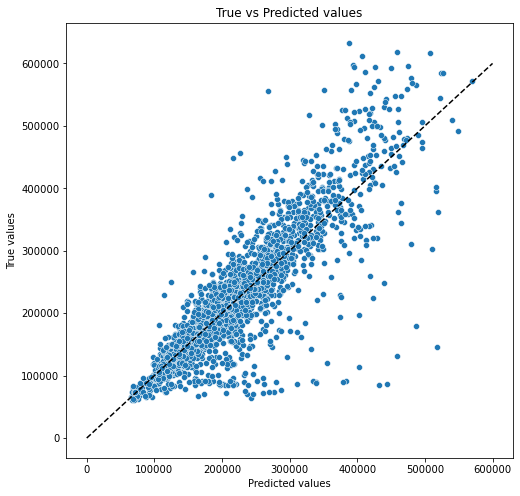

In [530]:
evaluate_preds(check_test["y_test"], check_test["y_pred"])

### Предсказываем на test

In [531]:
data_test_Id = data_test['Id']

In [532]:
data_test = data_test.drop(['Id', 'DistrictId', 'Healthcare_1'], axis=1)

In [533]:
colnames = data_test.columns
data_test = pd.DataFrame(scaler.fit_transform(data_test), columns=colnames)

In [534]:
data_test_pred = model.predict(data_test)

In [535]:
submit = pd.DataFrame({"Id": data_test_Id, "Price": data_test_pred})
submit

,Id,Price
0,725,148789.380987
1,15856,238669.565202
2,5480,208643.174815
3,15664,330863.066917
4,14275,147107.145972
...,...,...
4995,8180,241706.134589
4996,4695,103122.019222
4997,5783,309402.551688
4998,4780,213948.327243


## Сохранение результата

In [536]:
submit.to_csv('ASharafutdinov_predictions.csv', sep =',', index=False)